# everything up to getting the indices of the potential minimum

In [3]:
import numpy as np
import h5py
import glob, os, re, sys
sys.path.append('../')

from GriddedData import GriddedDataset
import astro_helper as ah

import configparser
config = configparser.ConfigParser()
config.read('./config_test.ini')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

In [11]:
gal = GriddedDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    zbin_width_ptl=10.,
    xymax=2., # kpc
    snapname="snap-DESPOTIC_244.hdf5",
    exclude_temp_above=None,#float(config['ETG-vlM'].get('EXCLUDE_TEMP')),
    exclude_avir_below=None,#float(config['ETG-vlM'].get('EXCLUDE_AVIR')),
    exclude_HII=True,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

# check the mid-plane indices

In [12]:
zidcs = gal.get_int_force_left_right_xy(PartType=6)[2]

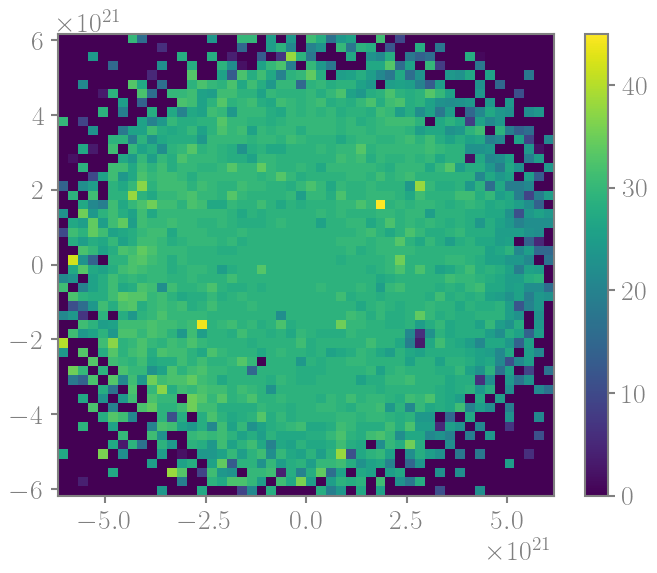

In [13]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, zidcs,
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [7]:
ForceLeft = gal.get_int_force_left_right_xy(PartType=6)[0]
ForceRight = gal.get_int_force_left_right_xy(PartType=6)[1]

/tmp/ipykernel_1341904/3663499010.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(ForceLeft)),


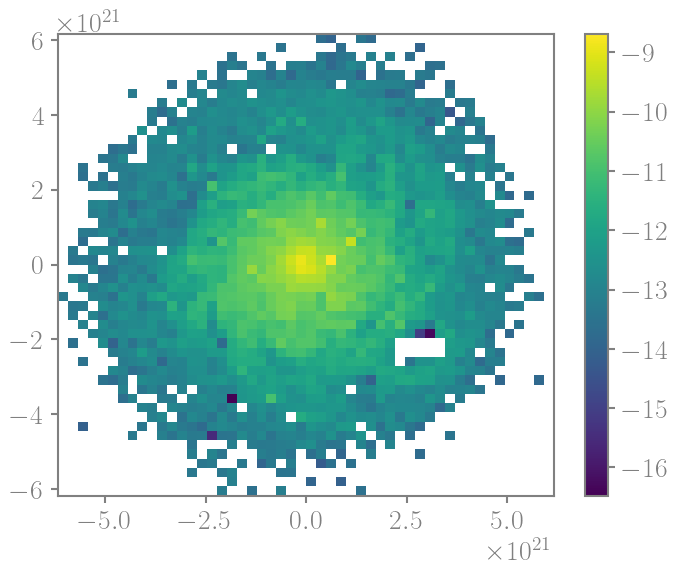

In [8]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(ForceLeft)),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_1341904/1280645834.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(ForceRight)),


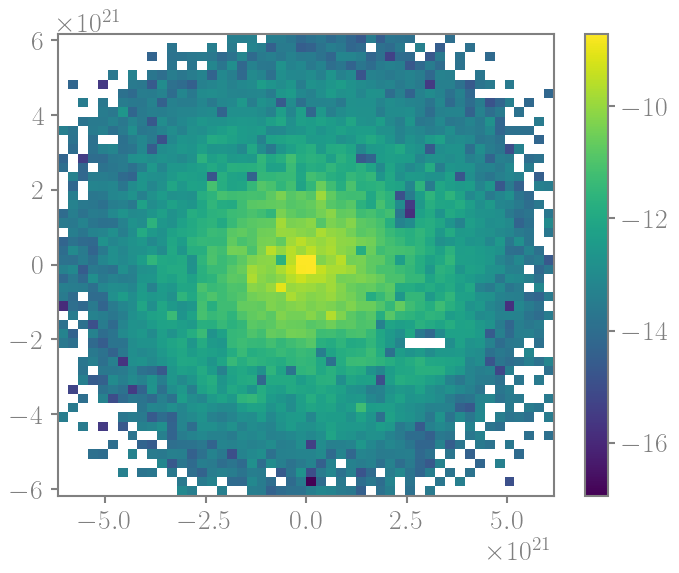

In [9]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(np.fabs(ForceRight)),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

# check that RBF interpolation for the potential is accurate

In [10]:
ptl = gal.get_potential_xyz()
print(np.shape(ptl))

(50, 50, 60)


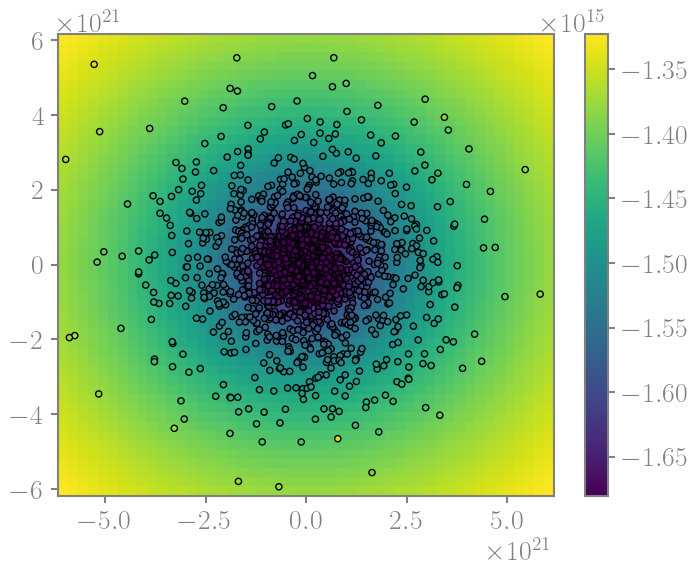

In [11]:
test_slice_z_idx = 0
z_grid = gal.zbin_centers_3d_ptl
test_min_z, test_max_z = np.min(z_grid[:,:,test_slice_z_idx]), np.max(z_grid[:,:,test_slice_z_idx])

real_gas_x = gal._read_snap_data(0)['x_coords']
real_gas_y = gal._read_snap_data(0)['y_coords']
cnd = (np.fabs(real_gas_x) < np.max(gal.xbin_edges)) & (np.fabs(real_gas_y) < np.max(gal.ybin_edges))
real_gas_ptl = gal._read_snap_data(0)['Potential'][cnd]
real_gas_x = real_gas_x[cnd]
real_gas_y = real_gas_y[cnd]

plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(
    gal.xbin_centers, gal.ybin_centers,
    ptl[:,:,test_slice_z_idx],
    cmap='viridis', shading='auto'
)
vmin = pcm.get_array().min()
vmax = pcm.get_array().max()
plt.scatter(
    real_gas_x[::100], real_gas_y[::100],
    c=real_gas_ptl[::100], s=20,
    edgecolor='k', vmin=vmin, vmax=vmax
)
plt.colorbar()
plt.show()

# check output arrays, no mid-plane required

/tmp/ipykernel_3733742/1853547720.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(gas_surfdens/ah.Msol_to_g*ah.pc_to_cm**2),


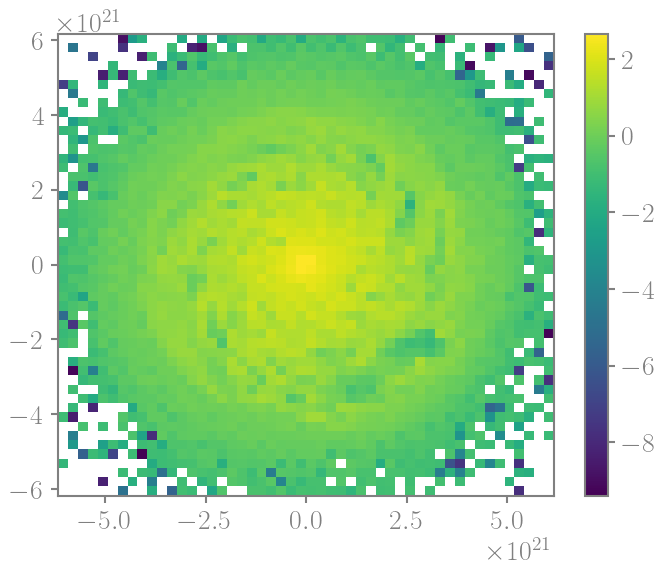

In [5]:
gas_surfdens = gal.get_surfdens_xy(PartType=6)

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(gas_surfdens/ah.Msol_to_g*ah.pc_to_cm**2),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

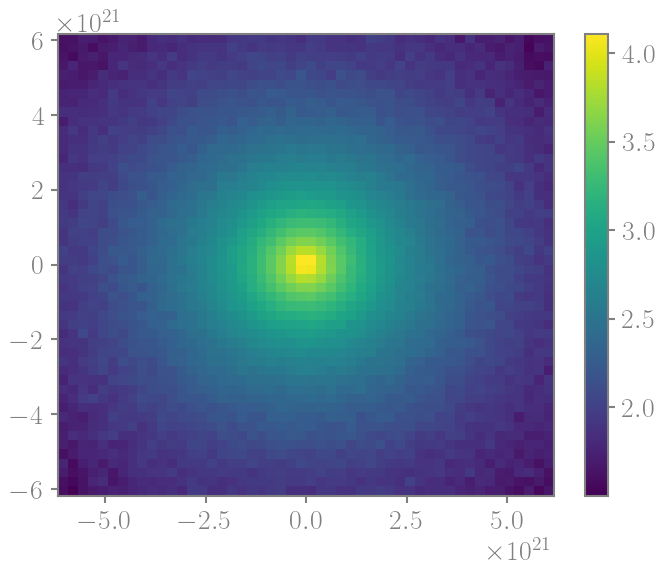

In [13]:
# PartType5 is all stellar particles together
stellar_surfdens = gal.get_surfdens_xy(PartType=5)

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(stellar_surfdens/ah.Msol_to_g*ah.pc_to_cm**2),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/n/home03/sjeffreson/GalactISM/notebooks/../GriddedData.py:467: RuntimeWarning: invalid value encountered in divide
  return H2_frac / mass
/tmp/ipykernel_1341904/1830074352.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(H2frac_2D),


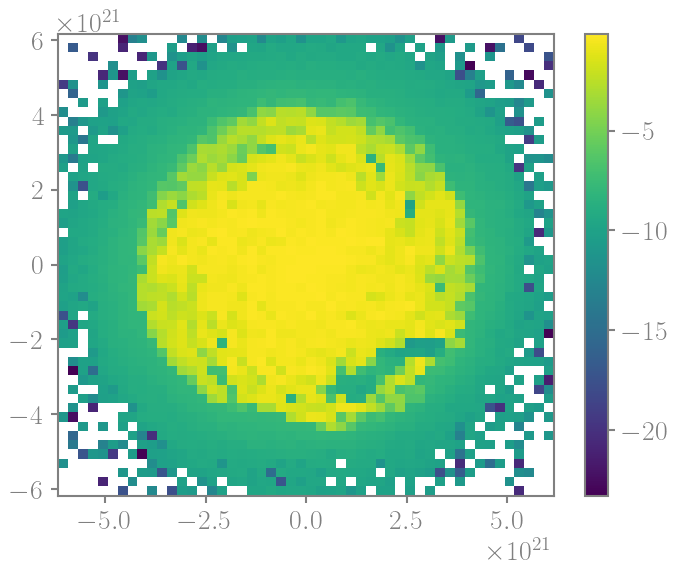

In [14]:
H2frac_2D = gal.get_H2_mass_frac_xy()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(H2frac_2D),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/n/home03/sjeffreson/GalactISM/notebooks/../GriddedData.py:502: RuntimeWarning: invalid value encountered in divide
  return HI_frac / mass


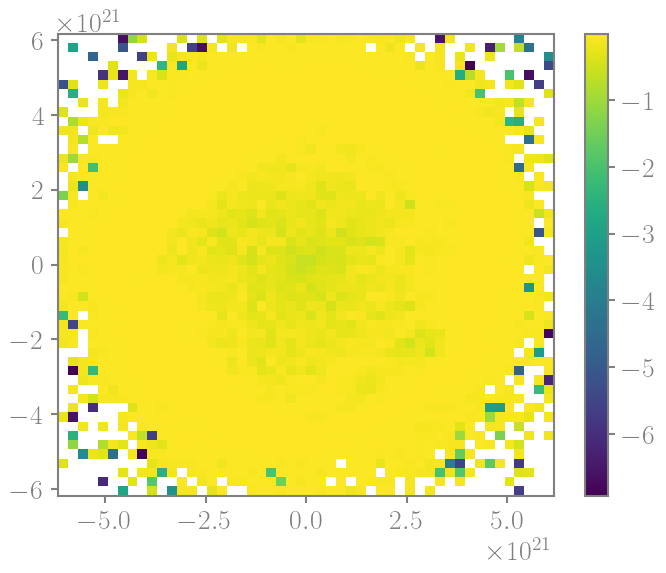

In [15]:
HIfrac_2D = gal.get_HI_mass_frac_xy()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(HIfrac_2D),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

/tmp/ipykernel_1341904/684048097.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(SFR_surfdens/ah.Msol_to_g*ah.kpc_to_cm**2*ah.yr_to_s),


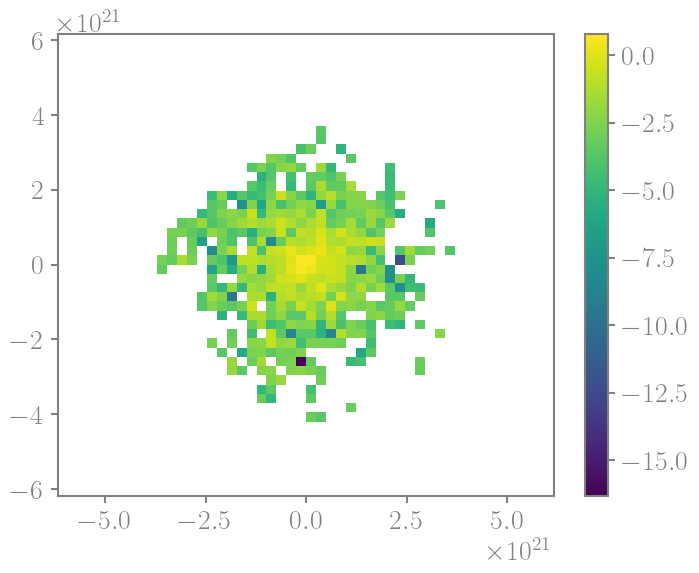

In [16]:
SFR_surfdens = gal.get_SFR_surfdens_xy()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(SFR_surfdens/ah.Msol_to_g*ah.kpc_to_cm**2*ah.yr_to_s),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

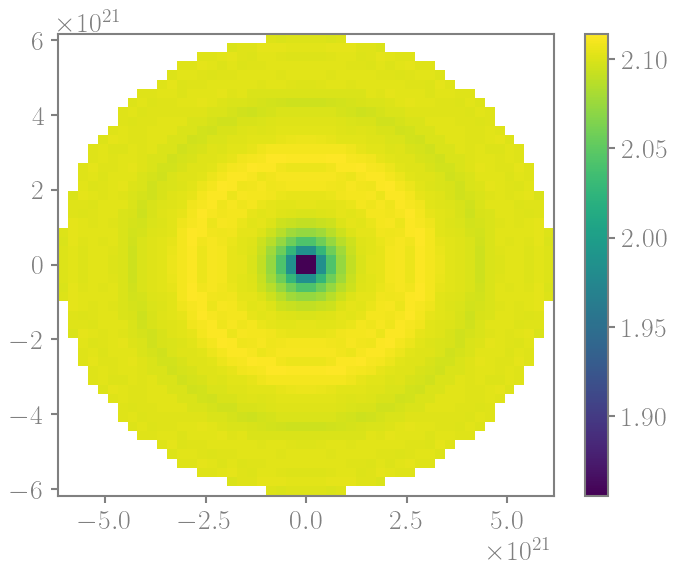

In [17]:
rotcurve = gal.get_rotation_curve_xy()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(rotcurve/ah.kms_to_cms),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

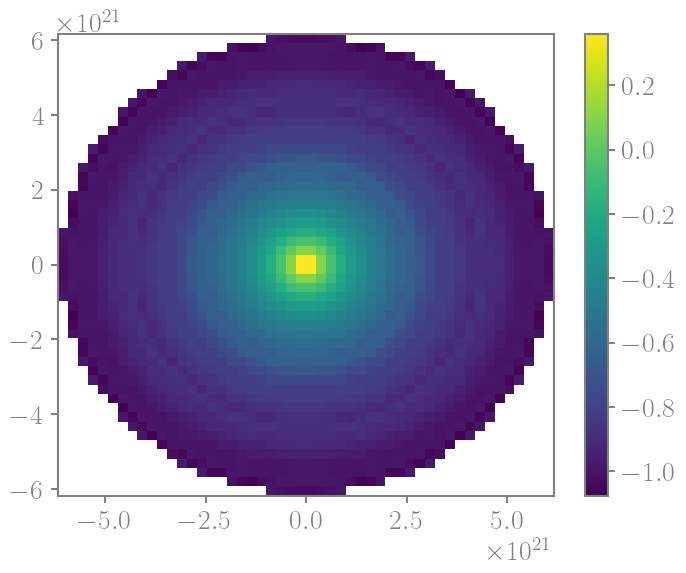

In [18]:
kappa = gal.get_kappa_xy()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(kappa*ah.Myr_to_s),
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [19]:
weight = gal.get_weight_xy(PartType=6)

/tmp/ipykernel_1341904/1370370394.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')


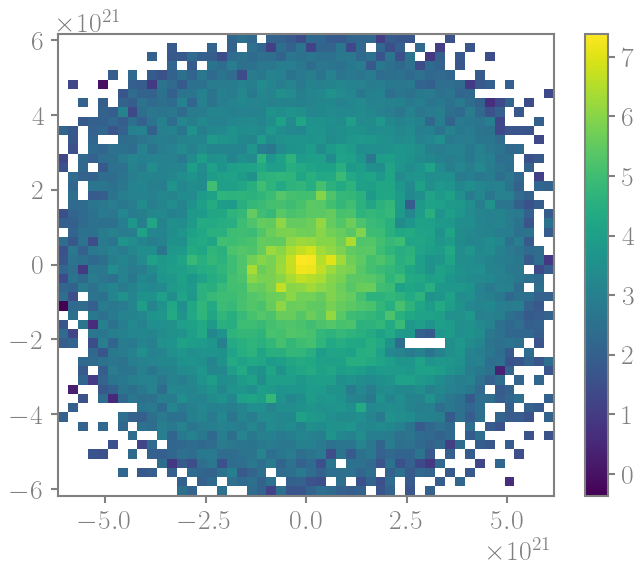

In [20]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal.xbin_centers, gal.ybin_centers, np.log10(weight/ah.kB_cgs), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

# check quantities that require the mid-plane indices

In [21]:
print(zidcs.shape)

(50, 50)


In [25]:
gal_zidcs = GriddedDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    zbin_width_ptl=10., # so it's quicker for checking
    xymax=2., # kpc
    snapname="snap-DESPOTIC_244.hdf5",
    exclude_temp_above=None,#float(config['ETG-vlM'].get('EXCLUDE_TEMP')),
    exclude_avir_below=None,#float(config['ETG-vlM'].get('EXCLUDE_AVIR')),
    exclude_HII=True,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
    midplane_idcs=zidcs
)

In [26]:
Ptherm = gal_zidcs.get_gas_midplane_thermpress_xy(PartType=6)

/tmp/ipykernel_3735040/342374213.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(Ptherm), cmap='viridis', shading='auto')


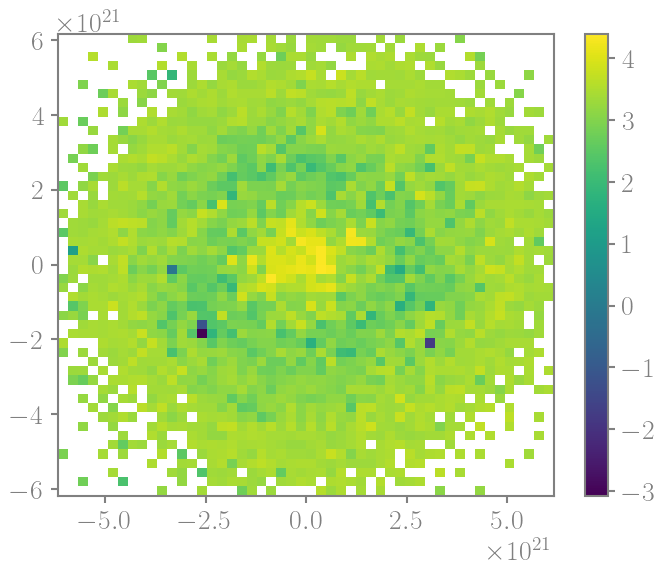

In [27]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(Ptherm), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [28]:
Pturb = gal_zidcs.get_gas_midplane_turbpress_xy(PartType=6)

/tmp/ipykernel_3735040/2599287100.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(Pturb),


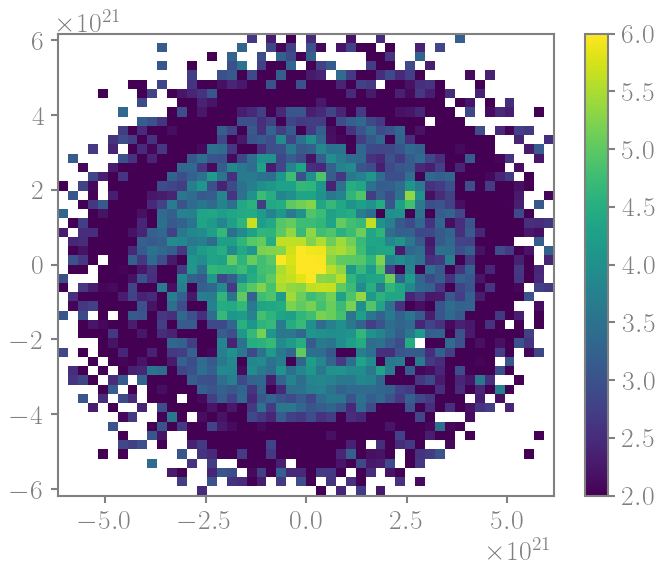

In [29]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(Pturb),
               vmin=2., vmax=6.,
               cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [30]:
vdx, vdy, vdz = gal_zidcs._get_gas_veldisps_xyz_xy(PartType=6)

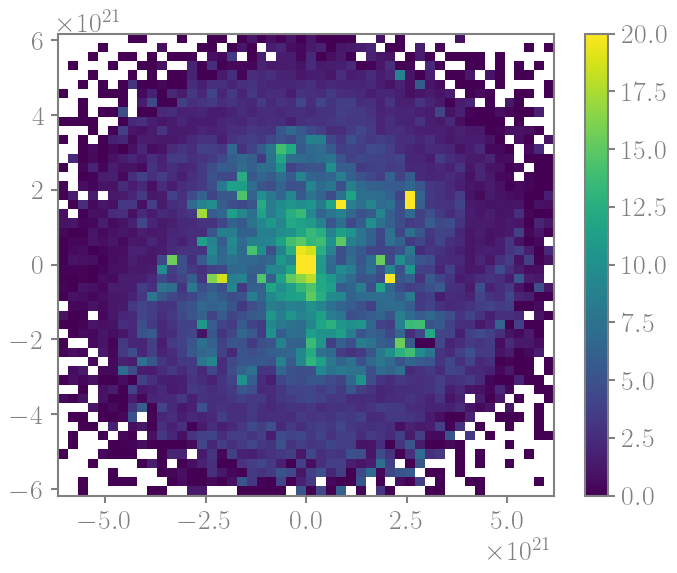

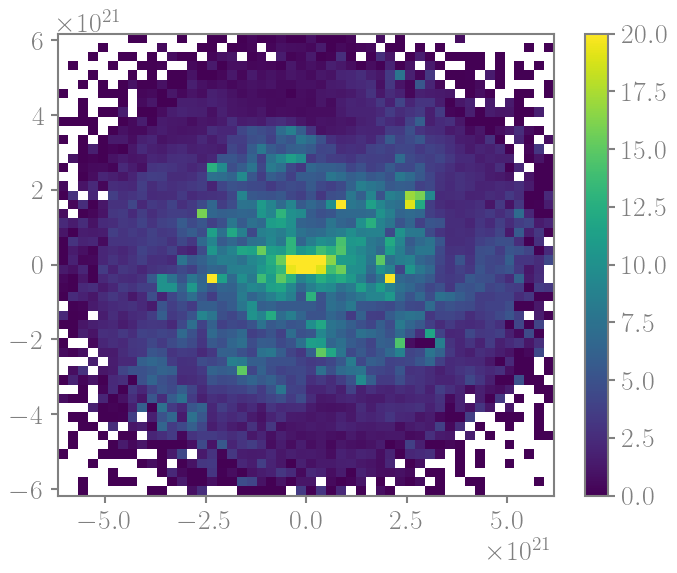

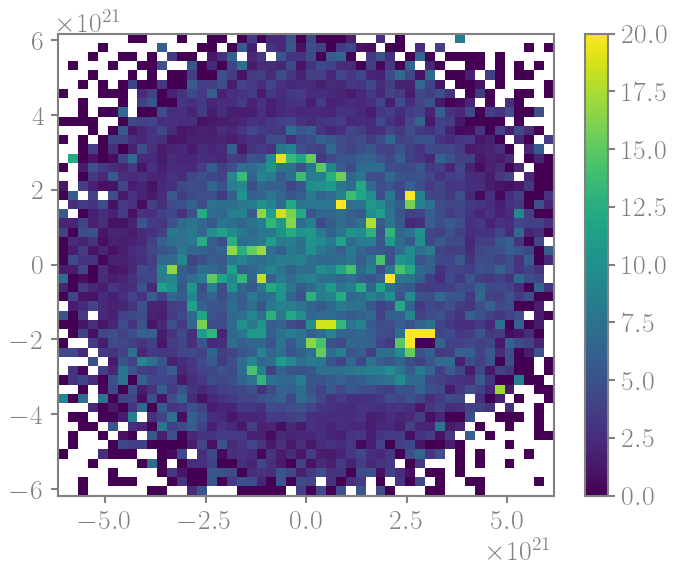

In [31]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vdx/ah.kms_to_cms,
               vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vdy/ah.kms_to_cms,
               vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vdz/ah.kms_to_cms,
               vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

In [32]:
vx, vy, vz = gal_zidcs._get_gas_av_vel_xyz_xy(PartType=6)

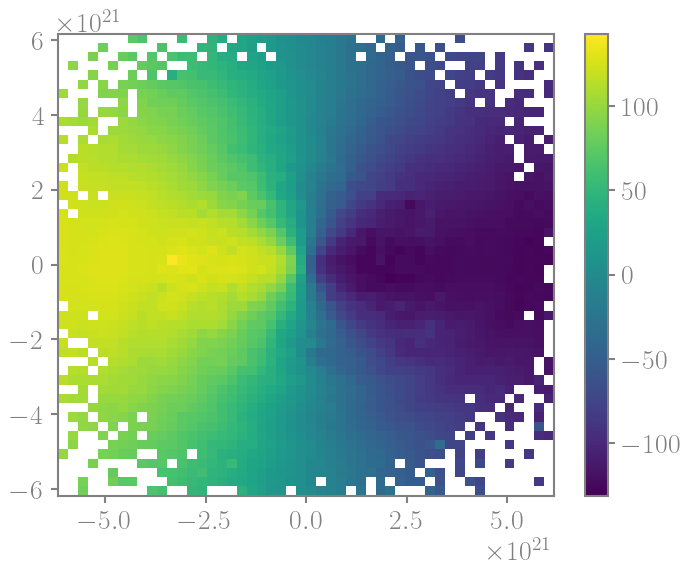

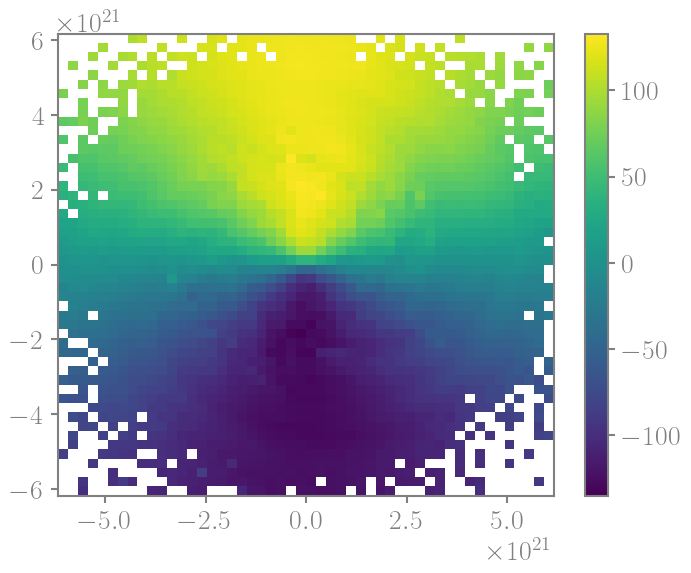

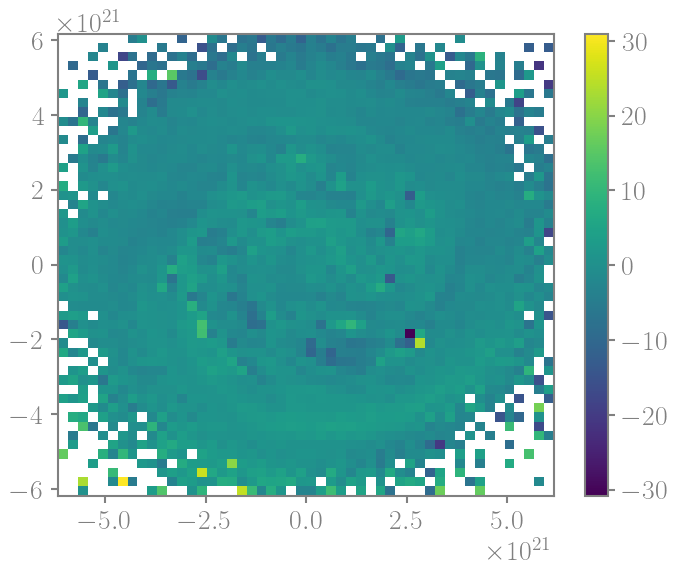

In [33]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vx/ah.kms_to_cms,
               #vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vy/ah.kms_to_cms,
               #vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, vz/ah.kms_to_cms,
               #vmin=0., vmax=20.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

In [34]:
gas_mp_voldens = gal_zidcs.get_midplane_density_xy(PartType=6)

/tmp/ipykernel_3735040/3823727137.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(gas_mp_voldens/ah.mp_cgs),


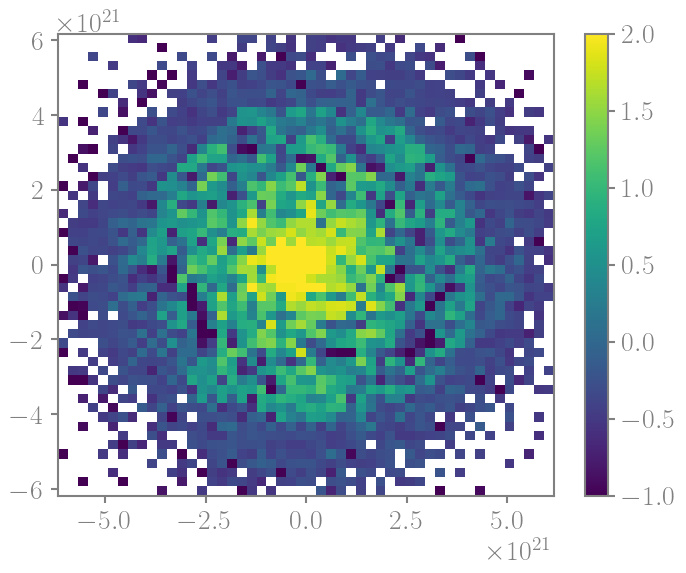

In [35]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(gas_mp_voldens/ah.mp_cgs),
               vmin=-1., vmax=2.,
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

In [35]:
star_mp_voldens = gal_zidcs.get_midplane_density_xy(PartType=5)

/tmp/ipykernel_1341904/193627376.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(star_mp_voldens/ah.mp_cgs),


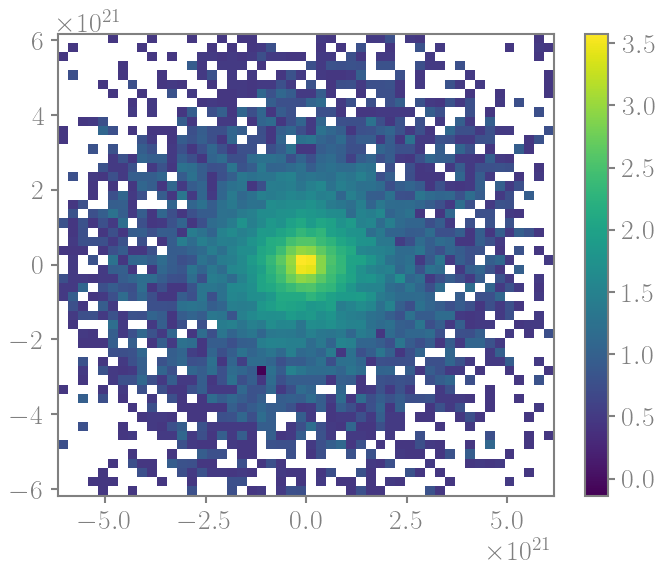

In [36]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(gal_zidcs.xbin_centers, gal_zidcs.ybin_centers, np.log10(star_mp_voldens/ah.mp_cgs),
               cmap='viridis', shading='auto')

plt.colorbar()
plt.show()

# check galaxies are being reoriented correctly via the angular momentum vector

In [37]:
gal_nat = GriddedDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    zbin_width_ptl=60., # so it's quicker for checking
    xymax=2., # kpc
    snapname="snap-DESPOTIC_100.hdf5",
    realign_galaxy_to_gas=False, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
    midplane_idcs=zidcs
)

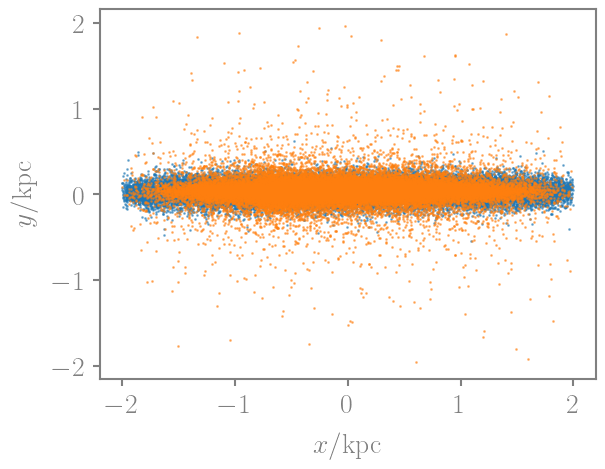

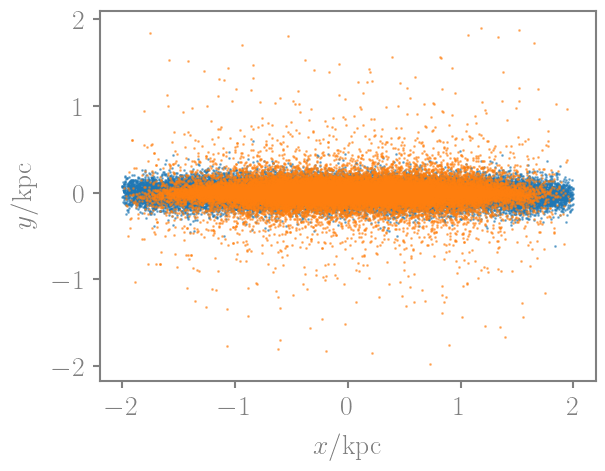

In [38]:
nat_gas = gal_nat._cut_out_particles(PartType=0)
nat_disk = gal_nat._cut_out_particles(PartType=2)

plt.scatter(nat_disk['y_coords']/ah.kpc_to_cm, nat_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(nat_gas['y_coords']/ah.kpc_to_cm, nat_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

rot_gas = gal_zidcs._cut_out_particles(PartType=0)
rot_disk = gal_zidcs._cut_out_particles(PartType=2)

plt.scatter(rot_disk['y_coords']/ah.kpc_to_cm, rot_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(rot_gas['y_coords']/ah.kpc_to_cm, rot_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()